
<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Logistic Regression (Diabetes)</strong></p> 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
df.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


##### DiabetesPedigreeFunction: diabetes history in relatives
##### BMI: Body mass index
##### Outcome is being diabet patient or not.

In [ ]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T  #insulin std is higher than its mean.outlier or not?

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

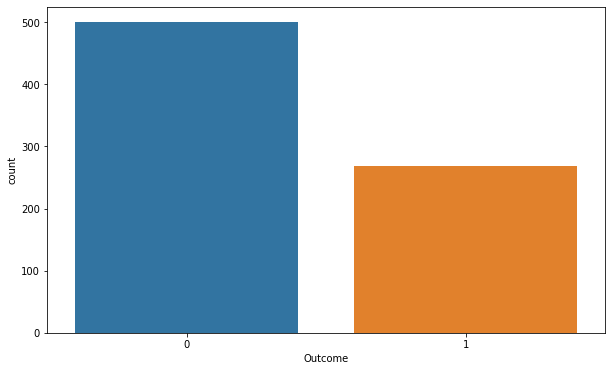

In [ ]:
sns.countplot(df.Outcome)

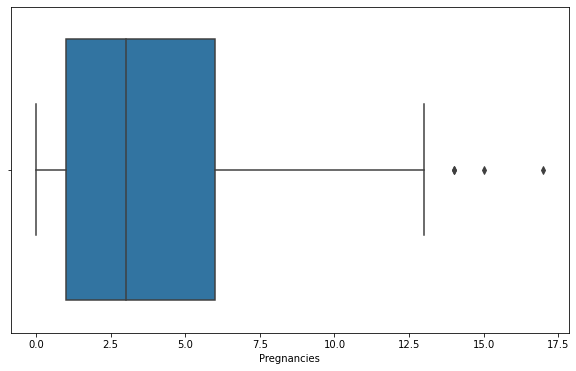

In [ ]:
sns.boxplot(df.Pregnancies)

In [ ]:
#df=df[df.Pregnancies<13]

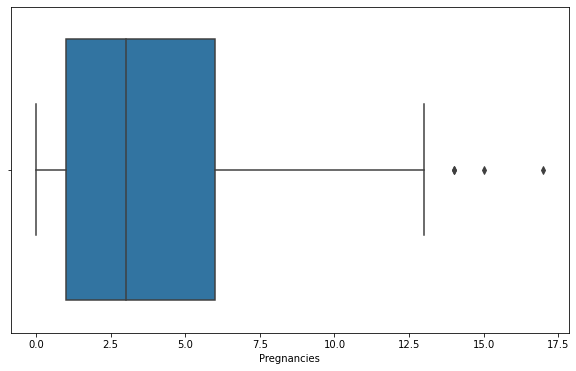

In [ ]:
sns.boxplot(df.Pregnancies)

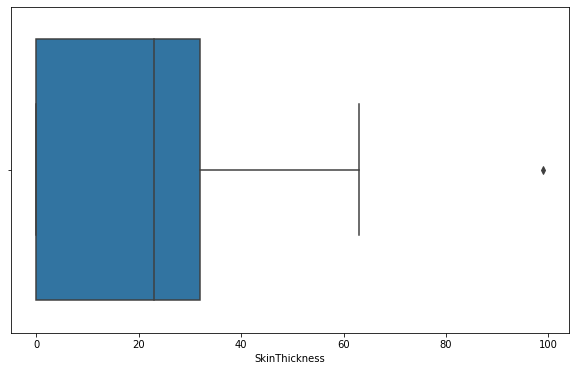

In [ ]:
sns.boxplot(df.SkinThickness) # domain knowledge is important.

In [ ]:
df=df[df.SkinThickness<70]

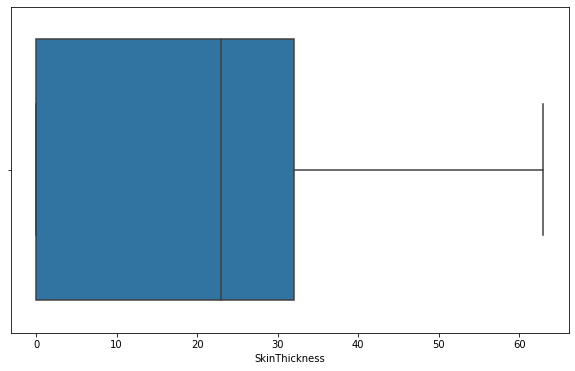

In [ ]:
sns.boxplot(df.SkinThickness)

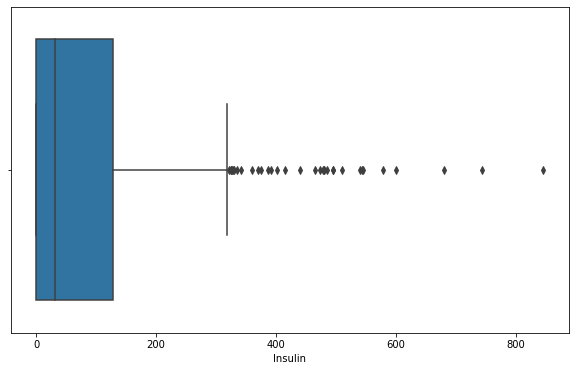

In [ ]:
sns.boxplot(df.Insulin)

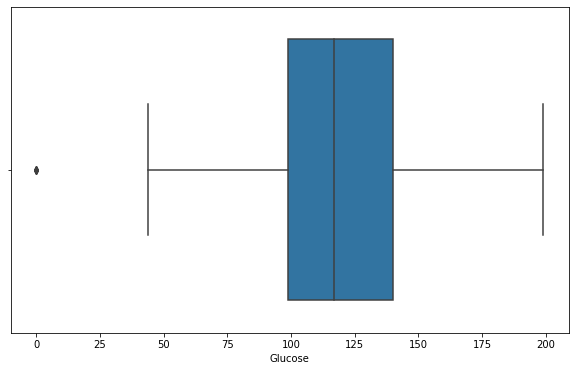

In [ ]:
sns.boxplot(df.Glucose)

In [ ]:
df=df[df.Glucose>0]

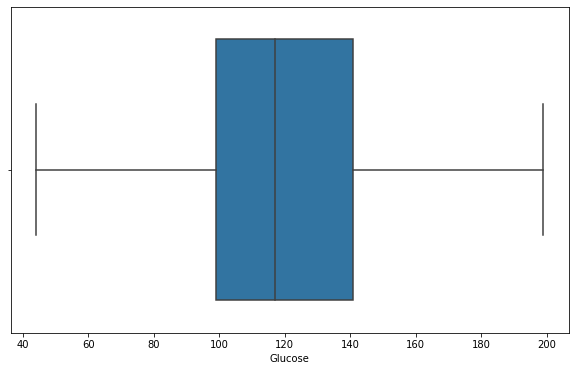

In [ ]:
sns.boxplot(df.Glucose)

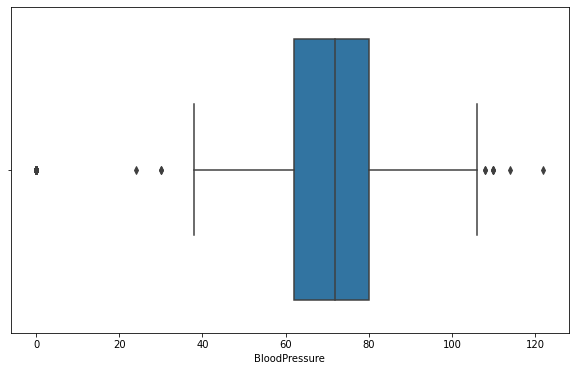

In [ ]:
sns.boxplot(df.BloodPressure)

In [ ]:
df=df[df.BloodPressure>35]

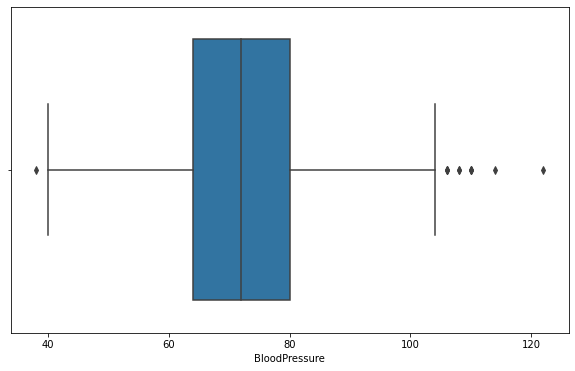

In [ ]:
sns.boxplot(df.BloodPressure)

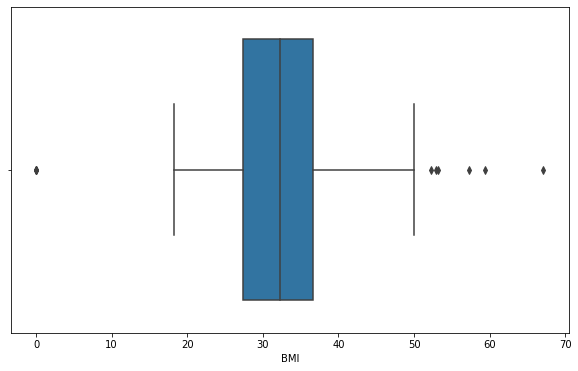

In [ ]:
sns.boxplot(df.BMI)

In [ ]:
df=df[df.BMI>0]

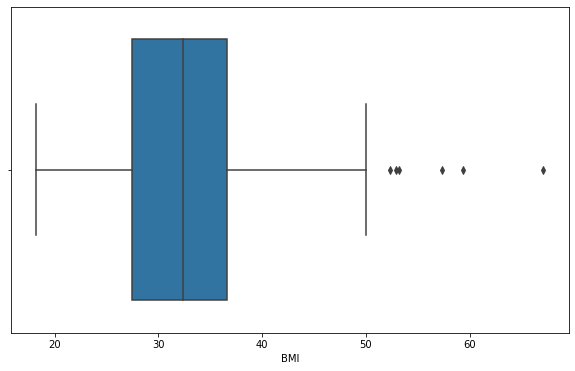

In [ ]:
sns.boxplot(df.BMI)

In [ ]:
df.shape

(720, 9)

In [ ]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

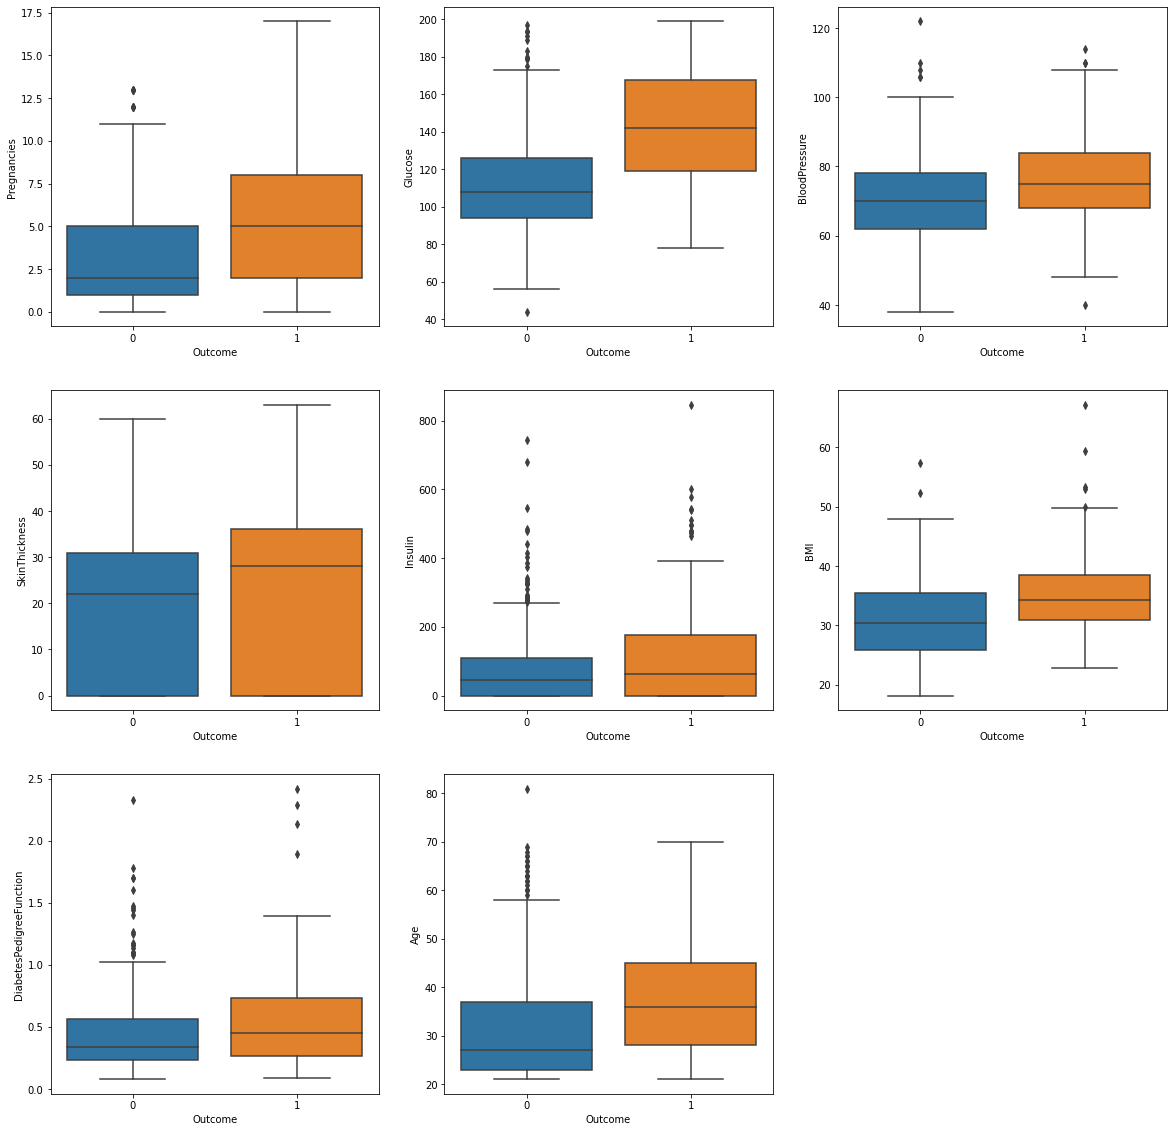

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

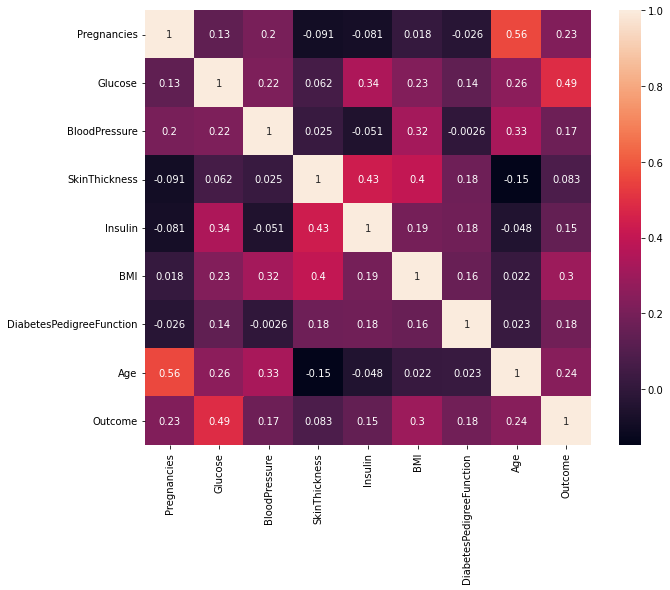

In [ ]:
plt.figure(figsize=(10,8))            #logistic regression içinde multicol.analizini ve düzenlemesini yapıyor.
sns.heatmap(df.corr(), annot=True)

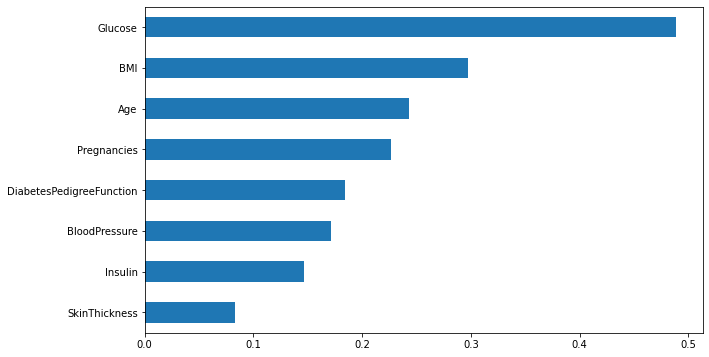

In [ ]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

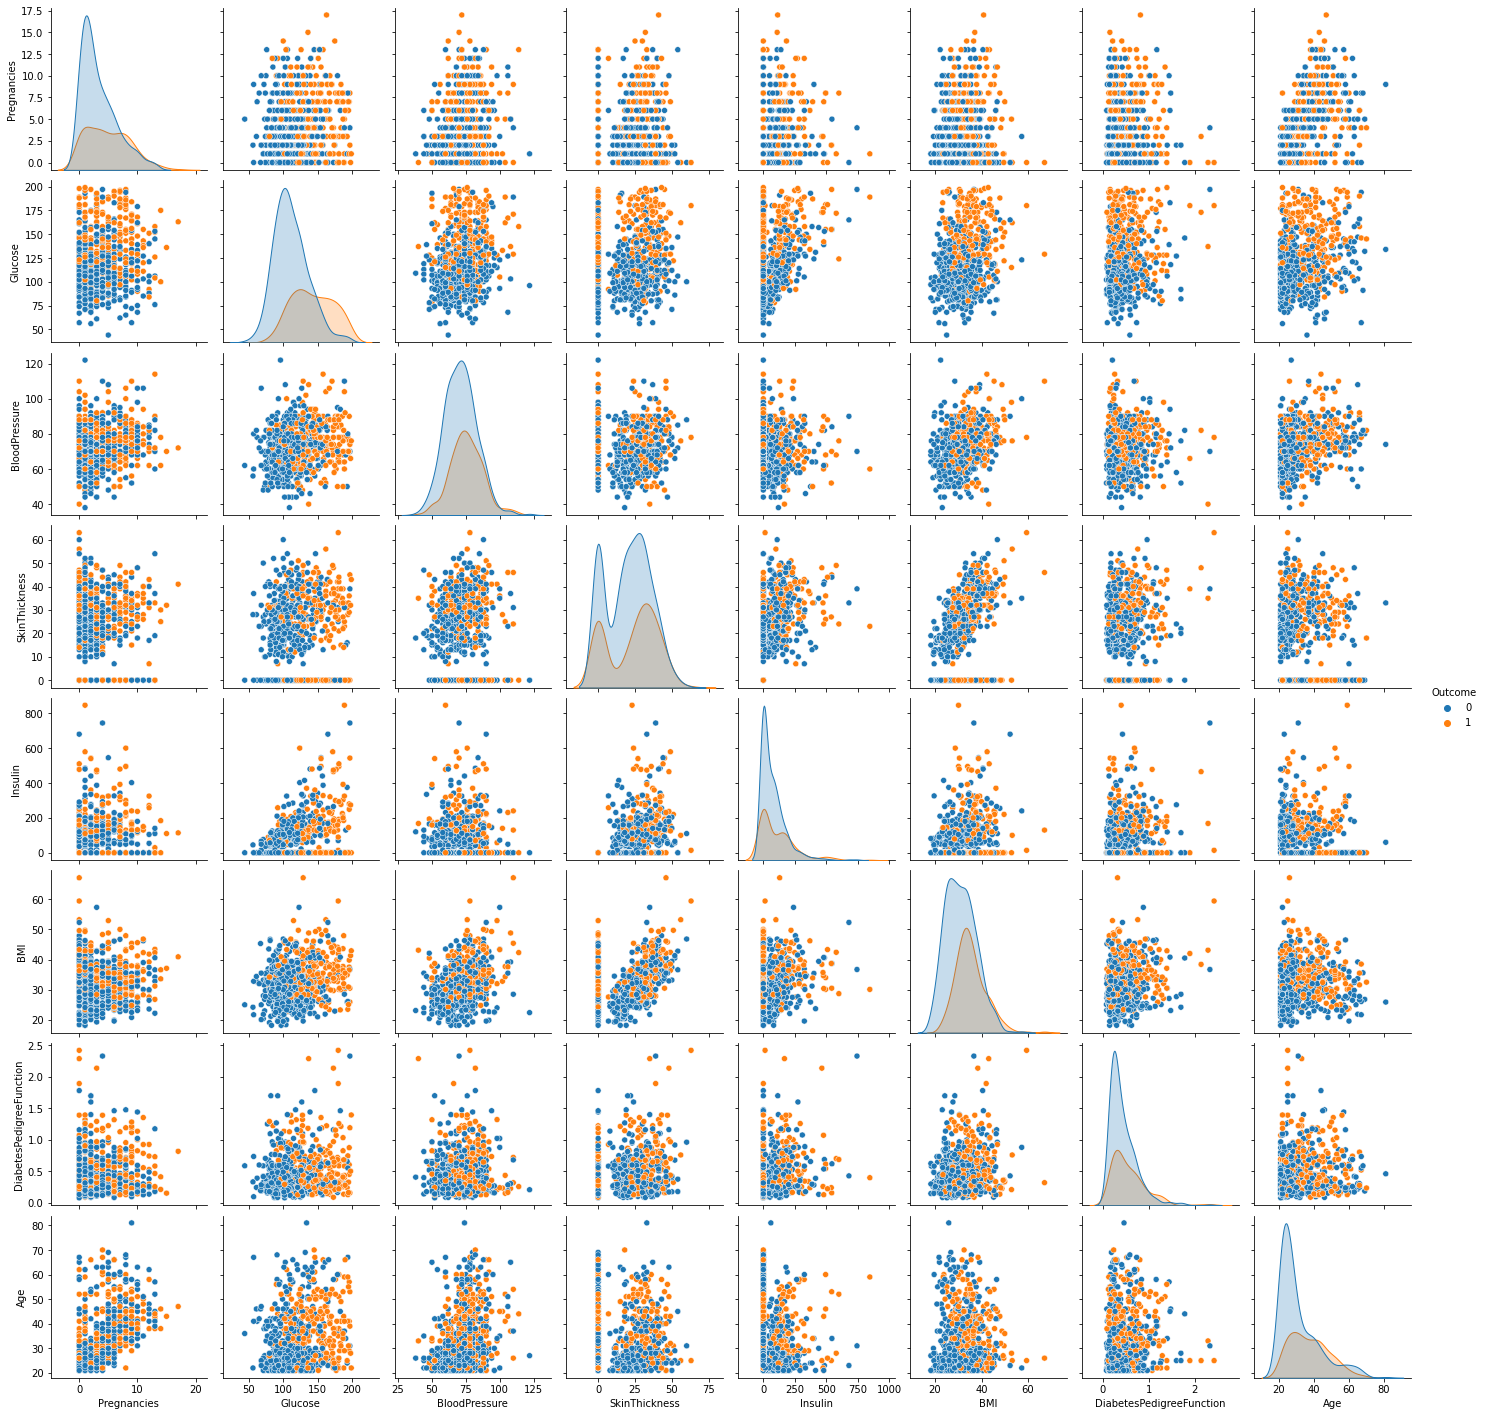

In [ ]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split and Scaling

In [ ]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) 

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

If there's class in-balance in the data, wouldn't it be preserved on average when doing a random split of the data? Yes it will be preserved on average; with stratify, it will be preserved for sure.

With very small or very imbalanced data sets, it's quite possible that the random split could completely eliminate a class from one of the splits.

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred=log_model.predict(X_test_scaled)

In [ ]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
48,7,103,66,32,0,39.100,0.344,31,1,0,0.401
719,5,97,76,27,0,35.600,0.378,52,1,0,0.232
205,5,111,72,28,0,23.900,0.407,27,0,0,0.131
624,2,108,64,0,0,30.800,0.158,21,0,0,0.125
99,1,122,90,51,220,49.700,0.325,31,1,0,0.461
365,5,99,54,28,83,34.000,0.499,30,0,0,0.239
598,1,173,74,0,0,36.800,0.088,38,1,1,0.683
673,3,123,100,35,240,57.300,0.880,22,0,1,0.766
102,0,125,96,0,0,22.500,0.262,21,0,0,0.063
403,9,72,78,25,0,31.600,0.280,38,0,0,0.106


## Model Performance on Classification Tasks

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)  #F1  lerin birb yakın olmasıyla overfitliğe bakarız.underfit diyemiyoruz.cross ve grid sonrası netleşicek.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10) #tanımlılar o yüzden list içinde 
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.008,0.003,0.600,0.450,0.514,0.707
2,0.004,0.003,0.643,0.450,0.529,0.724
3,0.004,0.003,0.923,0.600,0.727,0.845
4,0.004,0.003,0.857,0.600,0.706,0.828
5,0.004,0.003,0.706,0.600,0.649,0.776
6,0.004,0.003,0.647,0.550,0.595,0.741
7,0.004,0.003,0.714,0.526,0.606,0.772
8,0.004,0.003,0.647,0.579,0.611,0.754
9,0.004,0.003,0.733,0.550,0.629,0.772
10,0.004,0.003,0.625,0.500,0.556,0.719


In [ ]:
df_scores.mean()[2:]  #cross validate sonrası overall scores daha güvenilirdir.

test_precision   0.710
test_recall      0.541
test_f1          0.612
test_accuracy    0.764
dtype: float64

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)  #buradaki sonuçlar bir case için.cv öncesi.kıyaslamak için çağırdım.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

Çok kullanılmayabilir.Ek bilgi.
CV herzaman target yani 1 için yapar.Bu sıfır için olan.

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_0": precision_0, "recall_0": recall_0, "f1_0": f1_0}, #tanımlı değiller o yüzden dict yaptım.
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.009,0.005,0.744,0.842,0.790
2,0.008,0.005,0.750,0.868,0.805
3,0.008,0.005,0.822,0.974,0.892
4,0.007,0.005,0.818,0.947,0.878
5,0.007,0.005,0.805,0.868,0.835
6,0.008,0.005,0.780,0.842,0.810
7,0.008,0.005,0.791,0.895,0.840
8,0.008,0.004,0.800,0.842,0.821
9,0.008,0.005,0.786,0.892,0.835
10,0.008,0.005,0.756,0.838,0.795


In [ ]:
df_scores.mean()[2:]

test_precision_0   0.785
test_recall_0      0.881
test_f1_0          0.830
dtype: float64

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test) #ilk log model sonuçları.

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [72]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)                           #kaysayı alpha gibi.Ne kadar küçük o kadar güçlü regularization strength.
class_weight= ["balanced", None] 
                                                     # The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies.
                                                     # in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]       #optimizasyon yöntemi.Hepsini veriyorum.En iyisini verecek.

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,          #gridsearch te scoringe ne verirsem onu en iyi yapacak şekilde çalışır.
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",       #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [ ]:
np.logspace(-1,5,20)

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [73]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [74]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [75]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [76]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

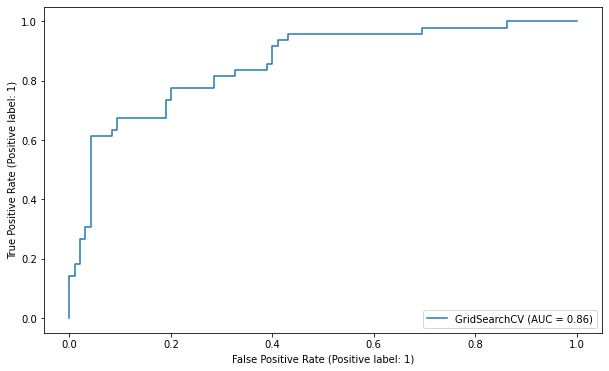

In [77]:
plot_roc_curve(grid_model, X_test_scaled, y_test);   #AUC accuracy veriyor.

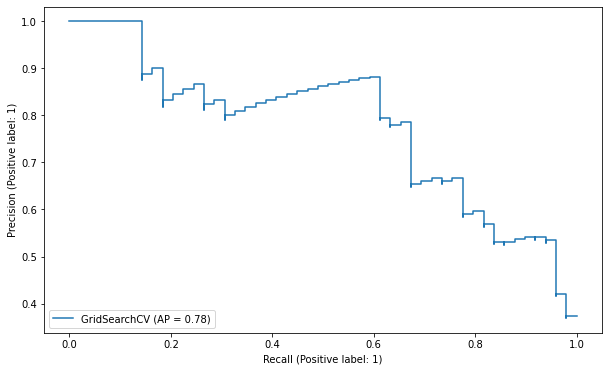

In [78]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);   #0.78 avarage precision.

## Finding Best Threshold for max recall score

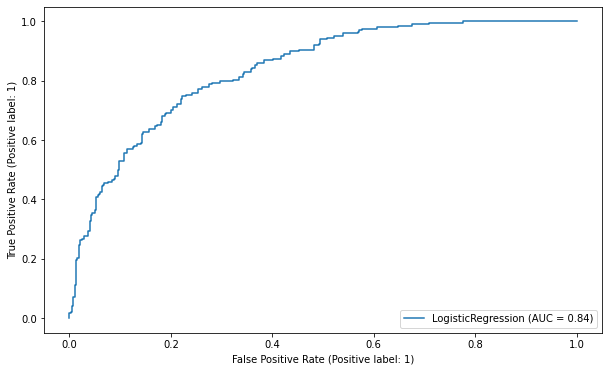

In [79]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [80]:
y_pred_proba = log_model.predict_proba(X_train_scaled)  # AUC alanı buldum.
roc_auc_score(y_train, y_pred_proba[:,1])  

0.8378493934049489

In [81]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])  #tüm fp,tp değerler ve thresholds.

In [82]:
optimal_idx = np.argmax(tp_rate - fp_rate)  # fark max olacak indexi buldum.
optimal_threshold = thresholds[optimal_idx] 
optimal_threshold

0.3393818488757875

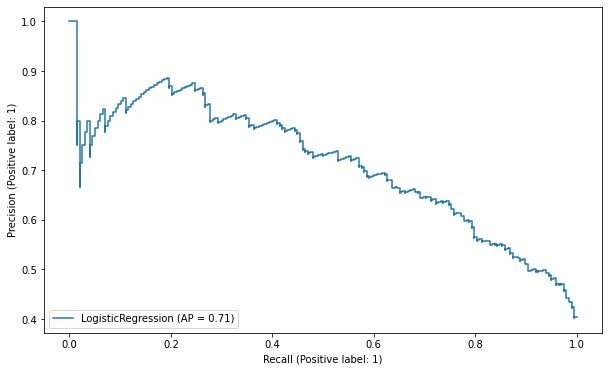

In [83]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [84]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.7120696300524079

In [85]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [107]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  # prec-recall curve de opt thresholdu aynı verir.
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3393818488757875

In [87]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.86113547, 0.91895207, 0.5401563 , 0.32834393, 0.84585831,
       0.19020537, 0.37229545, 0.89304143, 0.09179714, 0.23758232,
       0.42218219, 0.40054023, 0.32152256, 0.29622685, 0.91146953,
       0.04581758, 0.31483577, 0.77838131, 0.60683242, 0.17501505,
       0.59126241, 0.07183591, 0.8561969 , 0.26772363, 0.35899546,
       0.42664445, 0.21360625, 0.54007428, 0.47724442, 0.26626121,
       0.32222608, 0.47415193, 0.5996922 , 0.29605636, 0.92993383,
       0.16407762, 0.56707182, 0.37507219, 0.66446784, 0.17884314,
       0.22573707, 0.10909185, 0.1156293 , 0.76815923, 0.45682532,
       0.48417961, 0.45124617, 0.84198384, 0.89860936, 0.48442456,
       0.3184793 , 0.22797758, 0.45358026, 0.06128235, 0.085937  ,
       0.87896224, 0.65056268, 0.21426426, 0.720296  , 0.53913696,
       0.81873816, 0.62134406, 0.7600511 , 0.91816116, 0.84382984,
       0.17311379, 0.33796541, 0.36854126, 0.96338286, 0.10317684,
       0.503667  , 0.22026412, 0.76707416, 0.24151137, 0.65058

In [91]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0) # opt threshe göre tanımladım.

In [92]:
print(confusion_matrix(y_test,y_pred2))            #46 recall baya arttı.49 hastanın 46 sını doğru tahmin etti.Ancak false alarm 10dan 40a çıktı.
print(classification_report(y_test,y_pred2))

[[55 40]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72        95
           1       0.53      0.94      0.68        49

    accuracy                           0.70       144
   macro avg       0.74      0.76      0.70       144
weighted avg       0.81      0.70      0.71       144



In [93]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[196 182]
 [ 16 182]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       378
           1       0.50      0.92      0.65       198

    accuracy                           0.66       576
   macro avg       0.71      0.72      0.66       576
weighted avg       0.78      0.66      0.66       576



## Final Model and Model Deployment

In [94]:
scaler = StandardScaler().fit(X)

In [95]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [96]:
X_scaled = scaler.transform(X)

In [97]:
final_model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear').fit(X_scaled, y)

In [98]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [99]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,720.000,3.881,3.366,0.000,1.000,3.000,6.000,17.000
Glucose,720.000,121.897,30.649,44.000,100.000,117.000,142.000,199.000
BloodPressure,720.000,72.589,12.075,38.000,64.000,72.000,80.000,122.000
SkinThickness,720.000,21.288,15.477,0.000,0.000,24.000,33.000,63.000
Insulin,720.000,84.676,117.277,0.000,0.000,48.000,132.000,846.000
BMI,720.000,32.424,6.842,18.200,27.475,32.350,36.600,67.100
DiabetesPedigreeFunction,720.000,0.475,0.333,0.078,0.245,0.378,0.629,2.420
Age,720.000,33.339,11.737,21.000,24.000,29.000,41.000,81.000


## Using the Model

In [100]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

In [101]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33


In [102]:
scaler_diabates = pickle.load(open("scaler_diabates", "rb"))

In [103]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.26176089, -0.15989353, -0.04880222,  0.1107269 , -0.3129508 ,
        -0.06203757, -0.28511694, -0.3699221 ],
       [ 0.63004277,  0.59105285,  0.61417137,  0.75730737,  0.40380099,
         0.59612131,  0.46610236,  0.56790858],
       [ 0.33277488, -0.06194401,  0.19981287,  0.240043  , -0.25322148,
         0.23047749, -0.07477553, -0.02889276]])

In [104]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [105]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [106]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.34"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.34
0,3,117,72,23,48,32.000,0.380,29,0.368,0,1
1,6,140,80,33,132,36.500,0.630,40,0.757,1,1
2,5,120,75,25,55,34.000,0.450,33,0.497,0,1
